In [ ]:
import pandas as pd

import os

In [ ]:
df=pd.read_table('Pearson.txt',delimiter='\t')

In [ ]:
df.head(10)

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
5,63.0,64.2
6,65.4,64.1
7,64.7,64.0
8,66.1,64.6
9,67.0,64.0


In [ ]:
# finding correlation coefficient

correlation_coefficient=df.corr().loc['Father','Son']
correlation_coefficient

0.5011626808075893

In [ ]:
import statsmodels.api as sm

X=df['Father']
y=df['Son']


#adding constant intercept to the model
X=sm.add_constant(X)

#fit the regression model
model=sm.OLS(y,X).fit()

model_summary=model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Son   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     360.9
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           1.27e-69
Time:                        21:13:47   Log-Likelihood:                -2489.4
No. Observations:                1078   AIC:                             4983.
Df Residuals:                    1076   BIC:                             4993.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.8928      1.833     18.491      0.000      30.296      37.489
Father         0.5140      0.027     18.997      0.000       0.461       0.567
==============================================================================
Omnibus:                       17.527   Durbin-Watson:                   0.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.642
Skew:                          -0.052   Prob(JB):                     2.22e-07
Kurtosis:                       3.819   Cond. No.                     1.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

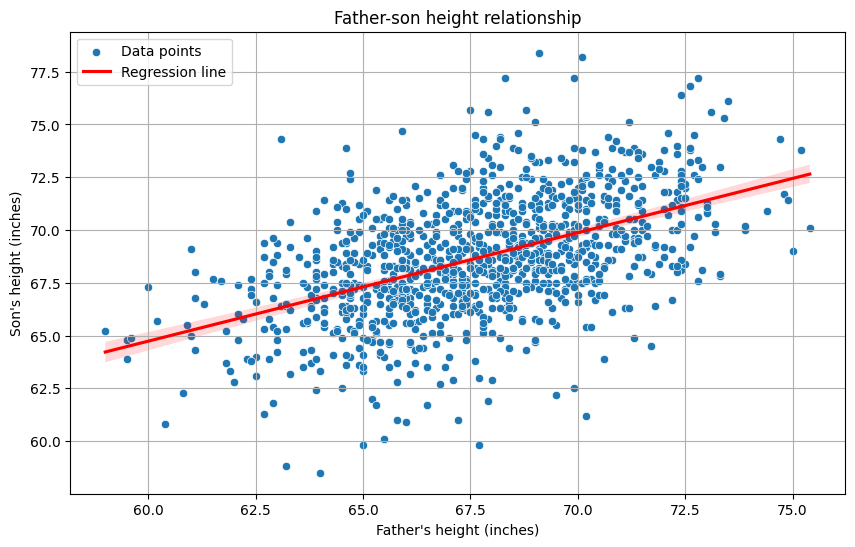

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#scatter plot with regression line

plt.figure(figsize=(10,6))
sns.scatterplot(x='Father',y='Son',data=df, label='Data points')
sns.regplot(x='Father',y='Son',data=df, scatter=False,label='Regression line', color='red')

plt.title('Father-son height relationship')
plt.xlabel('Father\'s height (inches)')
plt.ylabel('Son\'s height (inches)')
plt.legend()
plt.grid(True)
plt.show()